In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib.colors import Normalize
from pathlib import Path

In [14]:
# Current working directory (notebook folder)
notebook_path = Path.cwd()  # MLT/code/data_processing/
base_path = notebook_path.parent.parent  # Go up to MLT/

functions_path = notebook_path.parent / "000_Functions.ipynb"
bronze_path = base_path / "data" / "bronze"
silver_path = base_path / "data" / "silver"
plots_path = base_path / "plots"

In [23]:
# Load CSVs
df_2d = pd.read_csv( bronze_path / "bronze_saber_2d_tempoaral_agg.csv")
df_1d = pd.read_csv( bronze_path / "bronze_saber_1d_tempoaral_agg.csv")
sen = pd.read_csv( silver_path / "silver_sen_slope_1d.csv")
ita = pd.read_csv( silver_path / "silver_ita_1d.csv")

In [4]:
# Create 'year_month' for plotting
df_2d['year_month'] = pd.to_datetime(df_2d['year_month']).dt.to_period('M')
df_1d['year_month'] = pd.to_datetime(df_1d['year_month']).dt.to_period('M')

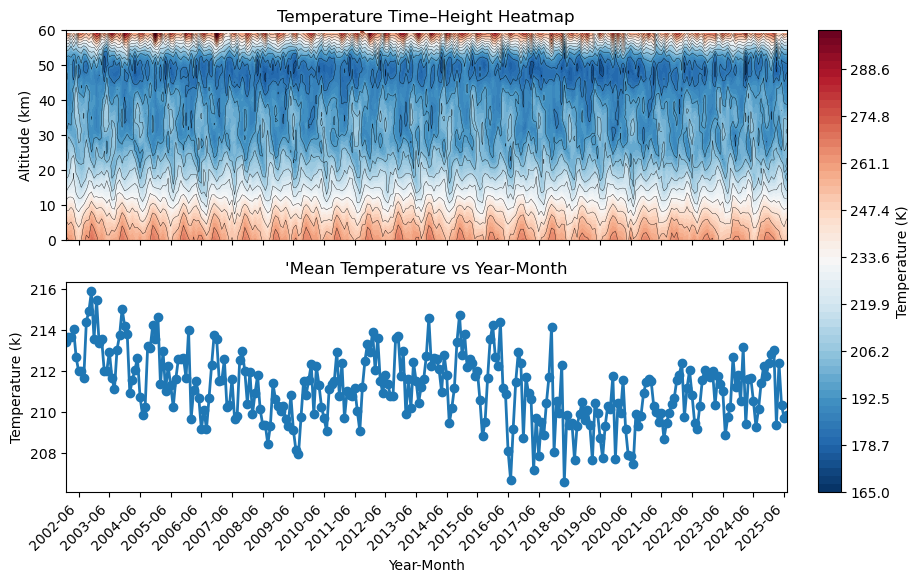

In [40]:
# --- Common Setup ---
pivot = df_2d.pivot_table(index='altitude_bin', columns='year_month', values='ktemp')

norm = Normalize(vmin=165, vmax=300)
levels = np.linspace(165, 300, 60)
line_levels = np.linspace(165, 300, 15)

X, Y = np.meshgrid(np.arange(pivot.shape[1]), np.arange(pivot.shape[0]))
Z = pivot.values

x_values = pivot.columns.astype(str)

# Build custom x-ticks
desired_ticks, desired_labels = [], []
for year in range(2002, 2025 + 1):
    for month in [6]:
        ym = f'{year}-{month:02d}'
        if ym in x_values:
            idx = list(x_values).index(ym)
            desired_ticks.append(idx)
            desired_labels.append(ym)

# Build custom y-ticks
ytick_pos, ytick_labels = [], []
yticks = [50, 60, 70, 80, 90, 100, 110, 120]
for alt in yticks:
    if alt in pivot.index:
        ytick_pos.append(pivot.index.get_loc(alt))
        ytick_labels.append(alt)

# --- Subplots ---
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# ---- Plot 1 ----
cf1 = axes[0].contourf(X, Y, Z, cmap='RdBu_r', norm=norm, levels=levels)
axes[0].contour(X, Y, Z, levels=line_levels, colors='black', linewidths=0.25)
axes[0].set_ylabel("Altitude (km)")
axes[0].set_title("Temperature Time–Height Heatmap")

# ---- Plot 2 ----
# Group by year_month and compute mean
df_all = df_1d.copy()
df_all = df_all.sort_values('year_month').reset_index(drop=True)


axes[1].plot(df_all['year_month'].astype(str), df_all['ktemp'], marker='o', linewidth=2, color='#1f77b4', label='Mean Temperature')
axes[1].set_xlabel("Year-Month")
axes[1].set_ylabel("Temperature (k)")
axes[1].set_title("'Mean Temperature vs Year-Month")

# Common colorbar
cbar = fig.colorbar(cf1, ax=axes, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label("Temperature (K)")

# Shared ticks and labels
plt.xticks(ticks=desired_ticks, labels=desired_labels, rotation=45, ha='right')

# plt.tight_layout()
plt.savefig(plots_path / "Temperature_Time_Height_Subplots.png", format='png', dpi=300, bbox_inches='tight')
plt.show()


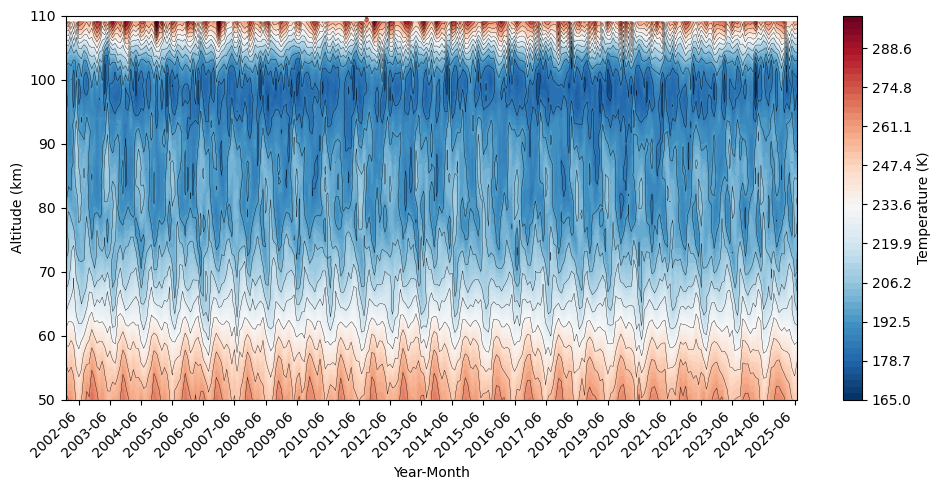

In [5]:
# # Pivot the data
# pivot = df_2d.pivot_table(index='altitude_bin', columns='year_month', values='ktemp')

# norm = Normalize(vmin=165, vmax=300)  # Set to match desired common scale
# levels = np.linspace(165, 300, 60)    # Shared contourf levels
# line_levels = np.linspace(165, 300, 15)  # Shared contour levels

# # Plot
# plt.figure(figsize=(10, 5))
# # Add contour lines
# X, Y = np.meshgrid(np.arange(pivot.shape[1]), np.arange(pivot.shape[0]))
# Z = pivot.values

# cf = plt.contourf(X, Y, Z, cmap='RdBu_r', norm=norm, levels=levels)
# cbar = plt.colorbar(cf)
# cbar.set_label('Temperature (K)')

# # Add contour lines (same levels to align with filled contours)
# contours = plt.contour(X, Y, Z, levels=line_levels, colors='black', linewidths=0.25)
# # plt.clabel(contours, inline=True, fontsize=5)


# # Set x-axis labels
# x_values = pivot.columns.astype(str)
# desired_ticks = []
# desired_labels = []

# for year in range(2002, 2025 + 1):
#     for month in [6]:
#         ym = f'{year}-{month:02d}'
#         if ym in x_values:
#             idx = list(x_values).index(ym)
#             desired_ticks.append(idx)
#             desired_labels.append(ym)
# plt.xticks(ticks=desired_ticks, labels=desired_labels, rotation=45, ha='right')

# # Set y-axis labels
# ytick_pos = []
# ytick_labels = []
# yticks = [50, 60, 70, 80, 90, 100, 110, 120]
# for alt in yticks:
#     if alt in pivot.index:
#         ytick_pos.append(pivot.index.get_loc(alt))
#         ytick_labels.append(alt)
# plt.yticks(ticks=ytick_pos, labels=ytick_labels)

# # Labels and title
# plt.xlabel('Year-Month')
# plt.ylabel('Altitude (km)')
# # plt.title('Time Dimension (Monthly Mean)')
# plt.tight_layout()
# plt.savefig(plots_path / "Temperature Time-Height Heatmap.png", format='png', dpi=300, bbox_inches='tight')
# plt.show()